In [2]:

import numpy as np
import pandas as pd
import seaborn as sns                 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [3]:

train=pd.read_csv("Train_1.csv")
train=train.drop(['Item_Identifier', 'Outlet_Identifier'],1)


In [4]:
test=pd.read_csv("Test_1.csv")
test=test.drop(["Item_Identifier","Outlet_Identifier"],1)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 665.9+ KB


In [6]:

train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train.shape, test.shape

((8523, 10), (5681, 9))

In [8]:
train.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Univariate analysis

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


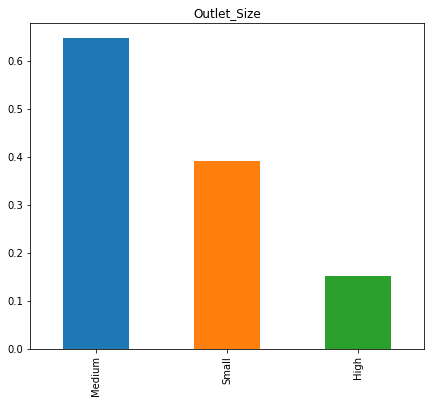

In [9]:


for i in range(0,len(train["Item_Fat_Content"])):
    if train['Item_Fat_Content'][i]=="reg":
        train["Item_Fat_Content"][i]="Regular"

    if train['Item_Fat_Content'][i]=="LF":
        train["Item_Fat_Content"][i]="Low Fat" 
        
    if train['Item_Fat_Content'][i]=="low fat":
        train["Item_Fat_Content"][i]="Low Fat"  

plt.figure(1)
plt.subplot(131)
train['Item_Fat_Content'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Item_Fat_Content')


train['Outlet_Size'].value_counts(normalize=True).plot.bar(title= 'Outlet_Size')

plt.show()

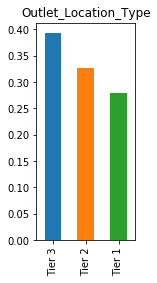

In [10]:
plt.subplot(131)
train['Outlet_Location_Type'].value_counts(normalize=True).plot.bar(title= 'Outlet_Location_Type')
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


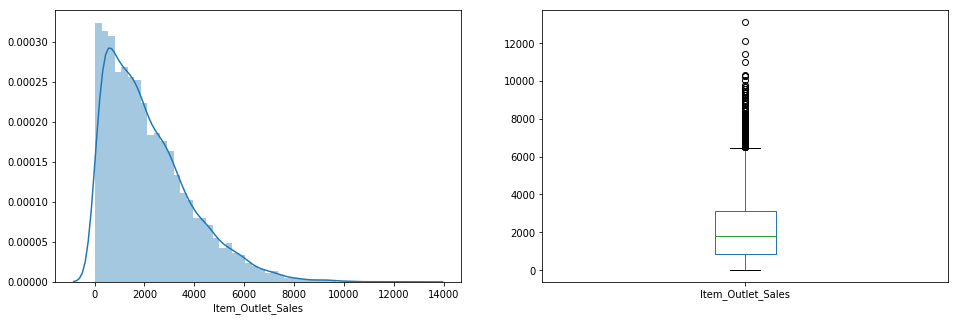

In [14]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Item_Outlet_Sales']);

plt.subplot(122)
train['Item_Outlet_Sales'].plot.box(figsize=(16,5))
plt.show()

Text(0.5,0.98,'')

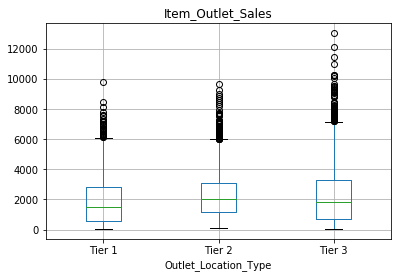

In [15]:
train.boxplot(column='Item_Outlet_Sales', by = 'Outlet_Location_Type')
plt.suptitle("")

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


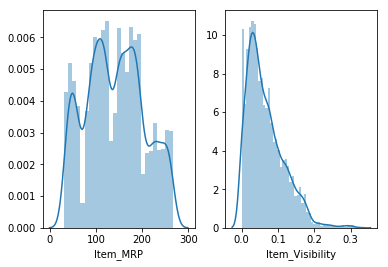

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Item_MRP']);
plt.subplot(122)
sns.distplot(train['Item_Visibility']);


Bivariate analysis

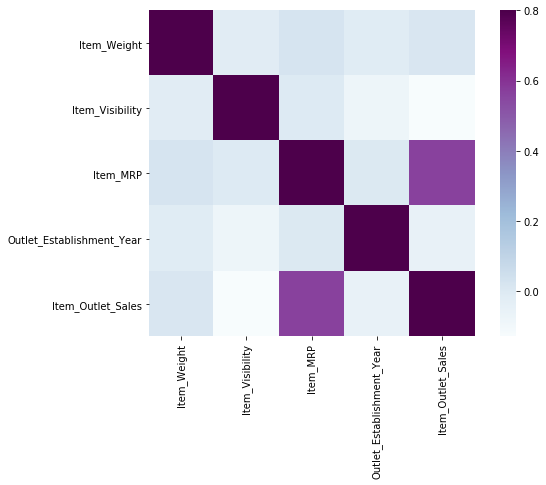

In [17]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

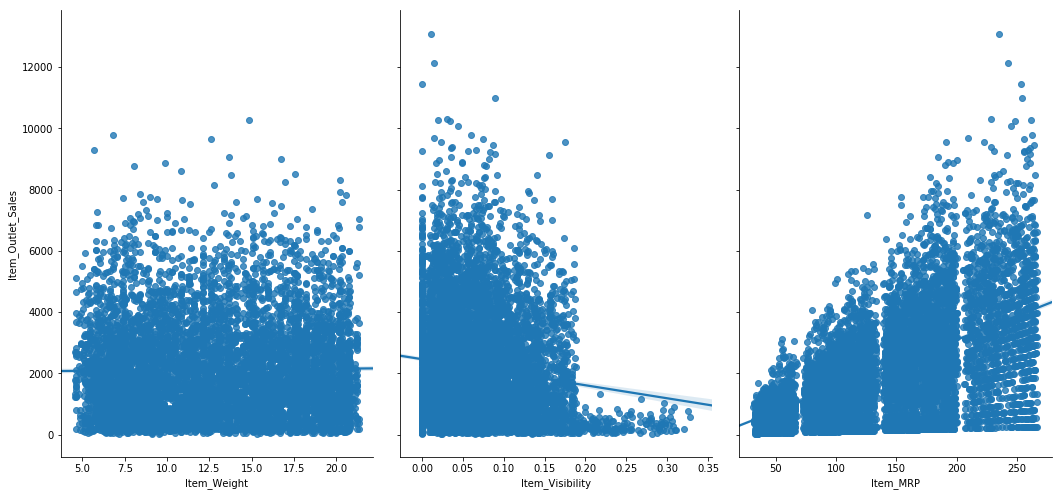

In [18]:
sns.pairplot(train, x_vars=['Item_Weight', 'Item_Visibility', 'Item_MRP'], y_vars='Item_Outlet_Sales', size=7, aspect=0.7, kind='reg')

Missing values

In [19]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])


In [20]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())


In [21]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))


In [22]:
le = LabelEncoder()
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train["Outlet_Type"]=le.fit_transform(train["Outlet_Type"])
train["Item_Type"]=le.fit_transform(train["Item_Type"])


In [23]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.066132,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.066132,9,53.8614,1987,0,2,1,994.7052


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated

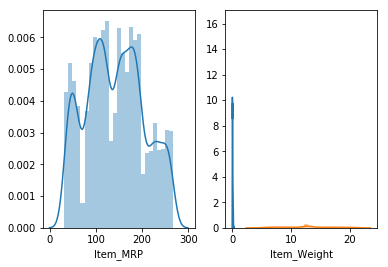

In [25]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Item_MRP']);
plt.subplot(122)
sns.distplot(train['Item_Visibility']);
plt.subplot(122)
sns.distplot(train['Item_Weight']);


In [26]:
X1=train.drop(['Item_Outlet_Sales',], axis=1)
y1 = train.Item_Outlet_Sales
y1 = y1.astype(int)

In [27]:
X = train.drop(['Item_Outlet_Sales',], axis=1)
y = train.Item_Outlet_Sales
y = y.astype(int)
y.dtype
train.shape

(8523, 10)

In [28]:
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])


In [29]:
test['Item_Visibility'] = test['Item_Visibility'].replace(0,np.mean(test['Item_Visibility']))


In [30]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())


In [31]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg', 'Regular')

In [32]:
test['Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])


In [33]:
test['Outlet_Size'] = le.fit_transform(test['Outlet_Size'])
test["Outlet_Type"]=le.fit_transform(test["Outlet_Type"])

In [34]:
test['Outlet_Location_Type']=le.fit_transform(test["Outlet_Location_Type"])
test["Item_Type"]=le.fit_transform(test["Item_Type"])


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)  


In [36]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

In [37]:
lreg.fit(X_train,y_train)
pred = lreg.predict(X_test)
mse = np.mean((pred - y_test)**2)
np.sqrt(mse)

1177.6149528452124

In [38]:
lreg.score(X_test,y_test)

0.5187546766820627

In [39]:
pred_cv = lreg.predict(test)

In [40]:
pred_cv

array([2076.65207427, 1347.9738992 , 2162.87464716, ..., 1718.70359482,
       3286.03635124, 1132.70377846])

In [45]:
from sklearn import tree  
model = tree.DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=9)
model.fit(X_train, y_train)
k=model.score(X_test,y_test)
y_pred= model.predict(X_test)


In [46]:
y_pred


array([2989.3691796 ,  708.64943457, 1544.04793757, ..., 3282.75257732,
        708.64943457, 3922.38561151])

In [47]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 752.4953200818544
Mean Squared Error: 1152054.6140614154
Root Mean Squared Error: 1073.3380707220888


In [48]:
from sklearn.ensemble import GradientBoostingRegressor #For Regression
clf = GradientBoostingRegressor(n_estimators=12, learning_rate=0.51, max_depth=2,min_samples_split=2,criterion='friedman_mse',max_features=9)
clf.fit(X_train, y_train)
p=clf.score(X_test,y_test)
y_pred= clf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  


Mean Absolute Error: 756.2025277918877
Mean Squared Error: 1147271.2188081138
Root Mean Squared Error: 1071.1074730427913
